In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv('C:/Users/Dell/OneDrive/Desktop/train.csv')

In [3]:
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,NaN,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [4]:
df.shape

(3609, 563)

In [5]:
df.isnull().sum()

rn                                      0
activity                               55
tBodyAcc.mean.X                         0
tBodyAcc.mean.Y                        35
tBodyAcc.mean.Z                         0
                                       ..
angle.tBodyGyroMean.gravityMean         0
angle.tBodyGyroJerkMean.gravityMean     0
angle.X.gravityMean                     0
angle.Y.gravityMean                     0
angle.Z.gravityMean                     0
Length: 563, dtype: int64

C:\Users\Dell\AppData\Local\Temp\ipykernel_19796\2668522192.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['tBodyAcc.mean.Y'])


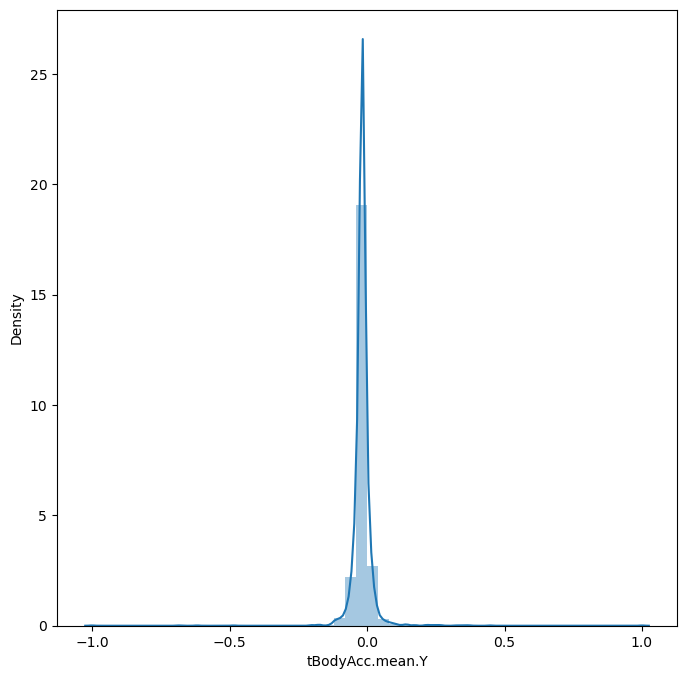

In [6]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(df['tBodyAcc.mean.Y'])
plt.show()

In [7]:
df['tBodyAcc.mean.Y'].fillna(df['tBodyAcc.mean.Y'].median(),inplace=True)

In [8]:
df.isnull().sum()

rn                                      0
activity                               55
tBodyAcc.mean.X                         0
tBodyAcc.mean.Y                         0
tBodyAcc.mean.Z                         0
                                       ..
angle.tBodyGyroMean.gravityMean         0
angle.tBodyGyroJerkMean.gravityMean     0
angle.X.gravityMean                     0
angle.Y.gravityMean                     0
angle.Z.gravityMean                     0
Length: 563, dtype: int64

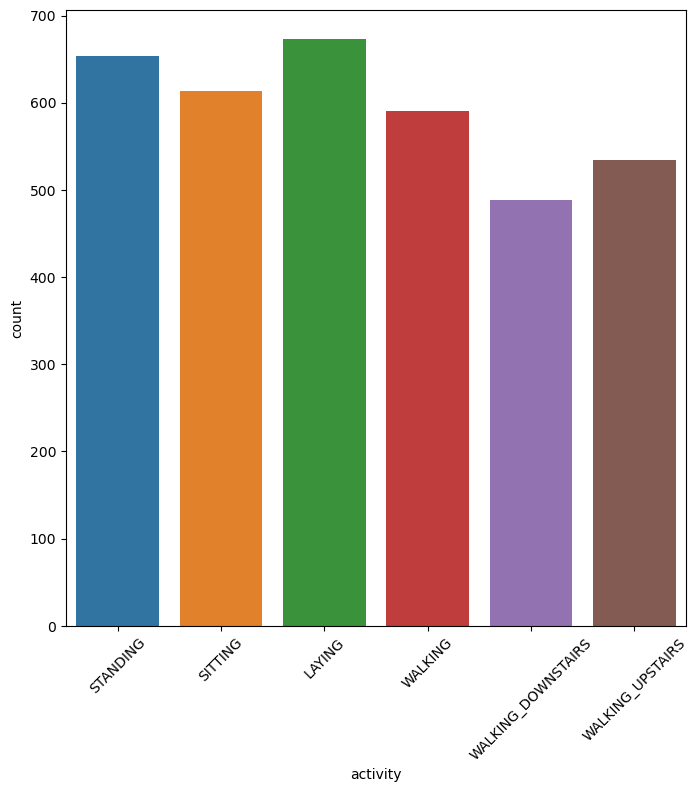

In [9]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='activity')
plt.xticks(rotation=45) 
plt.show()

In [10]:
df['activity'].fillna(df['activity'].mode()[0], inplace=True)

In [11]:
df.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

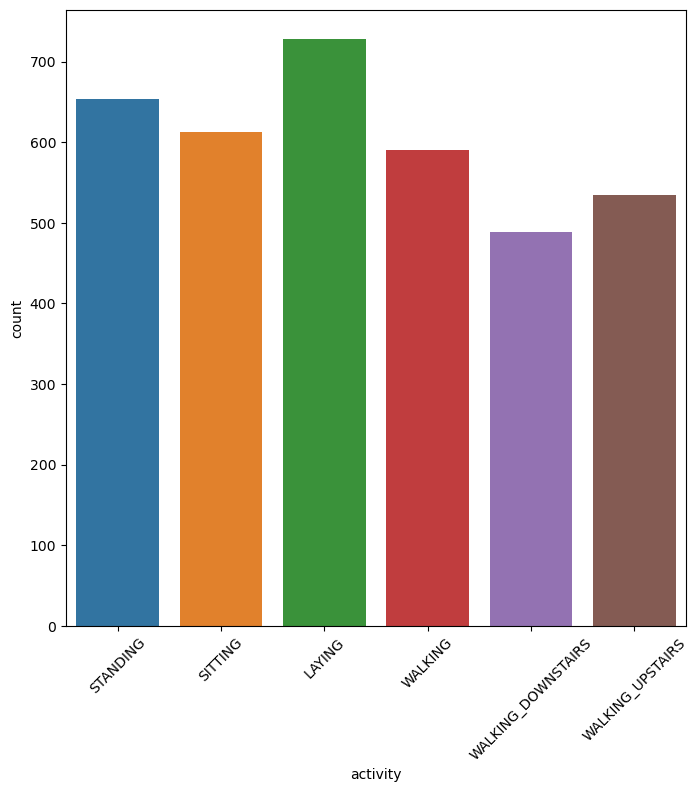

In [12]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.countplot(data=df, x='activity')
plt.xticks(rotation=45) 
plt.show()

In [13]:
print(df['tBodyAcc.mean.X'].std())

0.06358884031897258


In [14]:
X_train=df.drop(columns='activity')

In [15]:
Y_train=df['activity']

In [16]:
print(X_train.std())

rn                                     2975.767839
tBodyAcc.mean.X                           0.063589
tBodyAcc.mean.Y                           0.042553
tBodyAcc.mean.Z                           0.056218
tBodyAcc.std.X                            0.439157
                                          ...     
angle.tBodyGyroMean.gravityMean           0.613615
angle.tBodyGyroJerkMean.gravityMean       0.490830
angle.X.gravityMean                       0.509336
angle.Y.gravityMean                       0.311308
angle.Z.gravityMean                       0.263935
Length: 562, dtype: float64


In [17]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [18]:
X_train_standardized=scaler.transform(X_train)
print(X_train_standardized)

[[-1.72934983  0.07008998 -0.05252314 ... -0.69712768  0.39182231
   0.02729073]
 [-1.72800545  0.03863356  0.00388555 ... -0.69712768  0.41109853
   0.05874224]
 [-1.72699717  0.03863356  0.0626446  ... -0.69320045  0.41431123
   0.0572265 ]
 ...
 [ 1.72301069  0.14873103  0.221059   ... -0.31422328  0.68096551
   0.88368102]
 [ 1.72334679 -1.06234107  0.98633689 ... -0.31422328  0.664902
   0.90262771]
 [ 1.72368288  1.86310581 -0.01021662 ... -0.60876512  0.41752393
   0.63737408]]


In [19]:
X_train.std()

rn                                     2975.767839
tBodyAcc.mean.X                           0.063589
tBodyAcc.mean.Y                           0.042553
tBodyAcc.mean.Z                           0.056218
tBodyAcc.std.X                            0.439157
                                          ...     
angle.tBodyGyroMean.gravityMean           0.613615
angle.tBodyGyroJerkMean.gravityMean       0.490830
angle.X.gravityMean                       0.509336
angle.Y.gravityMean                       0.311308
angle.Z.gravityMean                       0.263935
Length: 562, dtype: float64

In [20]:
X_train_standardized.std()

0.9999999999999999

In [21]:
X_train.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,0.277,-0.0172,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [22]:
df['activity'].value_counts()

activity
LAYING                728
STANDING              654
SITTING               613
WALKING               591
WALKING_UPSTAIRS      534
WALKING_DOWNSTAIRS    489
Name: count, dtype: int64

In [23]:
label_encoder=LabelEncoder()

In [24]:
labels=label_encoder.fit_transform(df.activity)

In [25]:
df['target']=labels

In [26]:
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,target
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430,2
1,11,STANDING,0.277,-0.0172,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347,2
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351,2
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364,2
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296,2


In [27]:
df['target'].value_counts()

target
0    728
2    654
1    613
3    591
5    534
4    489
Name: count, dtype: int64

In [33]:
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the dataset
X_train_sampled, Y_train_sampled = ros.fit_resample(X_train, Y_train)

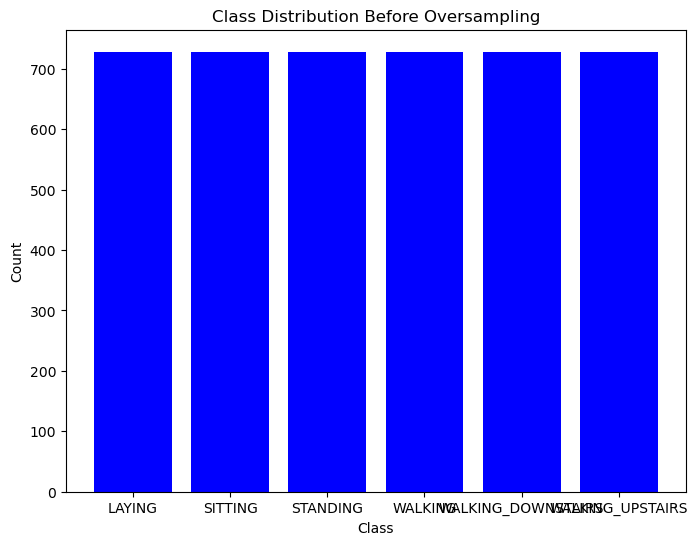

In [34]:

unique_classes, class_counts = np.unique(Y_train_sampled, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='blue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Oversampling')
plt.xticks(unique_classes)
plt.show()


In [41]:
X_train=X_train_sampled.to_numpy()
Y_train=Y_train_sampled.to_numpy()
class Node:
    def __init__(self, attribute=None, value=None, result=None):
        self.attribute = attribute  # Attribute to split on
        self.value = value          # Value of the attribute
        self.result = result        # Result if node is a leaf node
        self.children = {}          # Dictionary to hold child nodes

def entropy(class_labels):
    _, counts = np.unique(class_labels, return_counts=True)
    probabilities = counts / len(class_labels)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, classes, attribute_index):
    """
    Calculate the information gain for a given attribute.
    
    Parameters:
    - data: NumPy array containing the dataset.
    - classes: NumPy array containing the class labels.
    - attribute_index: Index of the attribute for which information gain is to be calculated.
    
    Returns:
    - The information gain.
    """
    total_entropy = entropy(classes)
    
    # Calculate entropy after splitting on the attribute
    unique_values = np.unique(data[:, attribute_index])
    weighted_entropy = 0
    for value in unique_values:
        subset_indices = data[:, attribute_index] == value
        subset_classes = classes[subset_indices]
        weighted_entropy += (subset_classes.shape[0] / classes.shape[0]) * entropy(subset_classes)
    
    # Calculate information gain
    information_gain = total_entropy - weighted_entropy
    
    return information_gain


def id3(data, classes, attributes):
    # Create a new node
    node = Node()
    
    # If all instances belong to the same class, return the class label
    if len(np.unique(classes)) == 1:
        node.result = classes[0]
        return node
    
    # If attributes is empty, return the majority class label
    if len(attributes) == 0:
        node.result = np.argmax(np.bincount(classes))
        return node
    
    # Find the attribute that provides the maximum information gain
    gains = [information_gain(data, classes, i) for i in range(len(attributes))]
    best_attribute_index = np.argmax(gains)
    best_attribute = attributes[best_attribute_index]
    
    # Create branches for the best attribute
    node.attribute = best_attribute
    node.children = {}
    for value in np.unique(data[:, best_attribute_index]):
        value = value.item()
        new_data = data[data[:, best_attribute_index] == value]
        new_classes = classes[data[:, best_attribute_index] == value]
        new_attributes = [a for a in attributes if a != best_attribute]
        node.children[value] = id3(new_data, new_classes, new_attributes)
    
    return node

def print_tree(node, depth=0, indent="   "):
    if node.result is not None:
        print(indent * depth + "Prediction:", node.result)
        return
    
    print(indent * depth + f"Split on feature {node.attribute}")
    for value, child_node in node.children.items():
        if isinstance(value, int) or isinstance(value, float):
            print(indent * (depth + 1) + f"If feature {node.attribute} <= {value}:")
        else:
            print(indent * (depth + 1) + f"If feature {node.attribute} == '{value}':")
        print_tree(child_node, depth + 1, indent)

# Define attributes (replace this with the indices of your dataset's attributes)
attributes = np.arange(X_train.shape[1])

# Run the ID3 algorithm
tree = id3(X_train, Y_train, attributes)

# Print the decision tree
print("Decision Tree:")
print_tree(tree)


Decision Tree:
Split on feature 0
   If feature 0 <= 7.0:
   Prediction: STANDING
   If feature 0 <= 11.0:
   Prediction: STANDING
   If feature 0 <= 14.0:
   Prediction: STANDING
   If feature 0 <= 15.0:
   Prediction: STANDING
   If feature 0 <= 20.0:
   Prediction: STANDING
   If feature 0 <= 21.0:
   Prediction: STANDING
   If feature 0 <= 22.0:
   Prediction: STANDING
   If feature 0 <= 24.0:
   Prediction: STANDING
   If feature 0 <= 31.0:
   Prediction: SITTING
   If feature 0 <= 32.0:
   Prediction: SITTING
   If feature 0 <= 41.0:
   Prediction: SITTING
   If feature 0 <= 42.0:
   Prediction: LAYING
   If feature 0 <= 44.0:
   Prediction: SITTING
   If feature 0 <= 48.0:
   Prediction: SITTING
   If feature 0 <= 50.0:
   Prediction: SITTING
   If feature 0 <= 53.0:
   Prediction: LAYING
   If feature 0 <= 54.0:
   Prediction: LAYING
   If feature 0 <= 55.0:
   Prediction: LAYING
   If feature 0 <= 57.0:
   Prediction: LAYING
   If feature 0 <= 58.0:
   Prediction: LAYING
   If